# SLR FINAL EXAM

### Data_set: 
Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

1. id = listing ID
2. name = name of the listing
3. host_id = host ID
4. host_name = name of the host
5. neighbourhood_group = location
6. neighbourhood = area
7. latitude = latitude coordinates
8. longitude = longitude coordinates
9. room_type = listing space type
10. price = price in dollars (Target variable)
11. minimum_nights = amount of nights minimum
12. number_of_reviews = number of reviews
13. last_review = latest review
14. reviews_per_month = number of reviews per month
15. calculated_host_listings_count = amount of listing per host
16. availability_365 = number of days when listing is available for booking

### 1.	 Read the dataset (tab, csv, xls, txt, inbuilt dataset) 






In [1]:
# Kindly change the below cells from markdown to code and execute it 

In [2]:
import pandas as pd

import csv

with open("data_set.csv","r")as file:

    reader=csv.reader(file)
    
df=pd.read_csv("data_set.csv")

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,12598446,Spacious 4bdrm next to CentralPk,5162192,Amy,Manhattan,Upper West Side,40.79860,-73.96229,Entire home/apt,275,30,4,09-01-2019,0.15,12,199
1,13585495,Great room in amazing Little Italy location!,15960548,Nathan,Manhattan,Little Italy,40.71955,-73.99707,Private room,110,2,1,14-09-2016,0.03,1,0
2,27761683,"Clean Cozy Room, Queens-5 min walk to subway (...",199524563,Bei,Queens,Rego Park,40.72678,-73.86218,Private room,55,2,25,22-06-2019,2.37,3,38
3,14200678,Charming 1 bdr apt. just 17 mins from MANHATTAN!,557669,Ryan,Queens,Woodside,40.74663,-73.89653,Entire home/apt,96,2,1,08-08-2016,0.03,1,0
4,24540935,A Beach House in Brooklyn,51068857,Derek,Brooklyn,Bedford-Stuyvesant,40.68297,-73.95251,Private room,80,1,0,NaN,NaN,1,5


### 2.	Summarize important observations from the data set (5 Marks)
Some pointers which would help you, but don’t be limited by these

a.	What are the number of rows; no. & types of variables (continuous, categorical etc.)

b.	Calculate five point summary for numerical variables

c.	Summarize observations for categorical variables – no. of categories, % observations in each category


In [3]:
#a)
print('Number of rows: ',df.shape[0])
print('Number of columns: ',df.shape[1])

Number of rows:  1054
Number of columns:  16


In [4]:
numerical_cols=df.select_dtypes(include='number').columns
print('There are',len(numerical_cols),' numerical columns.')

There are 10  numerical columns.


In [5]:
cat_cols=df.select_dtypes(include='object').columns
print('There are',len(cat_cols),' categorical columns.')

There are 6  categorical columns.


In [6]:
#b)
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.054000e+03,1.054000e+03,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,844.000000,1054.000000,1054.000000
mean,1.911356e+07,6.652685e+07,40.728377,-73.951802,149.699241,8.002846,24.620493,1.347690,6.959203,111.572106
std,1.096046e+07,7.757195e+07,0.056092,0.049034,156.239782,34.580253,49.178939,1.675154,31.266268,129.835933
min,1.229900e+04,2.787000e+03,40.499790,-74.240840,10.000000,1.000000,0.000000,0.020000,1.000000,0.000000
25%,9.391594e+06,6.983334e+06,40.689253,-73.983770,70.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.997263e+07,3.013617e+07,40.721665,-73.956930,104.000000,3.000000,6.000000,0.730000,1.000000,43.500000
75%,2.929557e+07,1.074344e+08,40.761120,-73.935523,179.000000,5.000000,24.000000,1.990000,2.000000,223.750000
max,3.648561e+07,2.722480e+08,40.898730,-73.731700,2000.000000,999.000000,426.000000,15.320000,327.000000,365.000000


In [7]:
df.describe(include='object')

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,1053,1054,1054,1054,1054,844
unique,1050,779,5,123,3,360
top,Spacious and Bright Williamsburg Loft,Alex,Manhattan,Williamsburg,Entire home/apt,01-07-2019
freq,2,13,449,92,539,32


Dropping unwanted columns:

In [8]:
df.drop(columns=['id','host_id','name','host_name'],inplace=True)

In [9]:
#c
for col in df.select_dtypes(include='object').columns:
    print(col,'Column :')
    print('Number of categories: ',df[col].nunique(),'\n')
    print('% observations in ',col,' :')
    print(df[col].value_counts(normalize=True),'\n')

neighbourhood_group Column :
Number of categories:  5 

% observations in  neighbourhood_group  :
Manhattan        0.425996
Brooklyn         0.408918
Queens           0.123340
Bronx            0.032258
Staten Island    0.009488
Name: neighbourhood_group, dtype: float64 

neighbourhood Column :
Number of categories:  123 

% observations in  neighbourhood  :
Williamsburg                 0.087287
Bedford-Stuyvesant           0.072106
Bushwick                     0.050285
Upper West Side              0.046490
Hell's Kitchen               0.043643
Harlem                       0.040797
East Village                 0.034156
Midtown                      0.034156
Lower East Side              0.029412
Crown Heights                0.027514
Upper East Side              0.024668
Chelsea                      0.021822
Astoria                      0.021822
Washington Heights           0.020873
Clinton Hill                 0.019924
East Harlem                  0.018027
West Village                 0.0

### 3.	Check for defects in the data. Perform necessary actions to ‘fix’ these defects (5 Marks)
Some pointers which would help you, but don’t be limited by these

a.	Do variables have missing/null values?

b.	Do variables have outliers?

c.	Is the data normally distributed? Is it a defect? Why or why not? 


In [10]:
#a)
df.isnull().sum()

neighbourhood_group                 0
neighbourhood                       0
latitude                            0
longitude                           0
room_type                           0
price                               0
minimum_nights                      0
number_of_reviews                   0
last_review                       210
reviews_per_month                 210
calculated_host_listings_count      0
availability_365                    0
dtype: int64

From the above we can say that there are 210 null values in the columns last_review and reviews_per_month

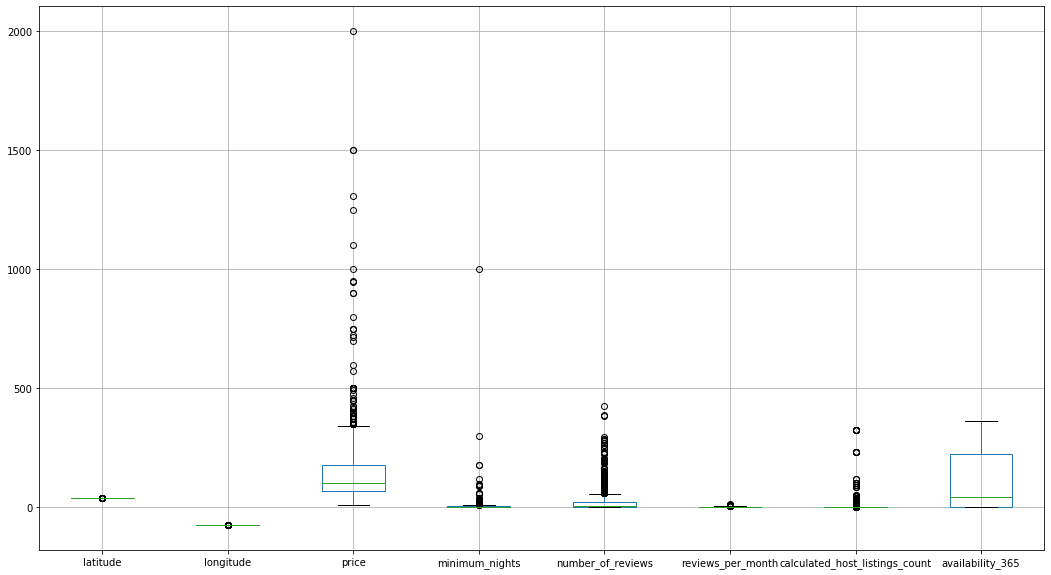

In [12]:
#b)
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
df.boxplot()

We can see from the above graph that there are outliers in price,minimum_nights,number_of_reviews,calculated_host_listing_count

Imputing null values:

In [13]:
df['last_review']=pd.to_datetime(df['last_review'])
df['month']=df['last_review'].dt.strftime('%m')

In [14]:
mode_val=df['month'].mode()
df['month']=df['month'].replace({'NaT':mode_val})

In [15]:
df['last_review']=df.groupby(['month'])['last_review'].fillna(df['last_review'].mode()[0])
df['reviews_per_month']=df.groupby(['month'])['reviews_per_month'].fillna(df['reviews_per_month'].mode()[0])

In [16]:
df.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
month                             0
dtype: int64

In [17]:
df.drop('month',axis=1,inplace=True)

Distribution of  latitude :
Skweness:  0.2570341739049472


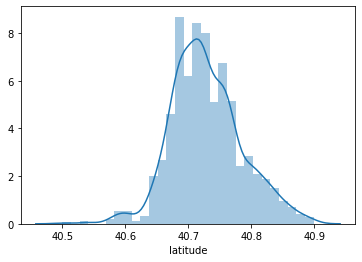

Distribution of  longitude :
Skweness:  0.9878346284259869


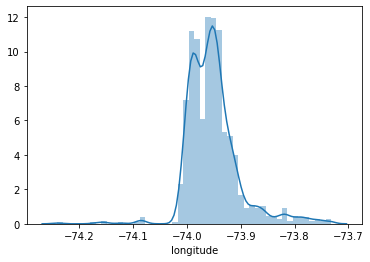

Distribution of  price :
Skweness:  4.981155542768506


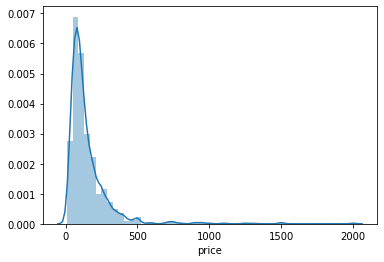

Distribution of  minimum_nights :
Skweness:  23.322089752532857


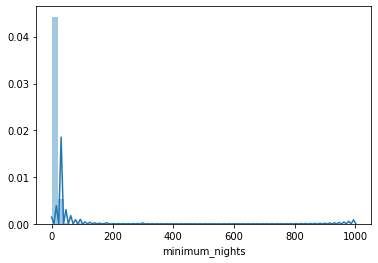

Distribution of  number_of_reviews :
Skweness:  3.7131116161914086


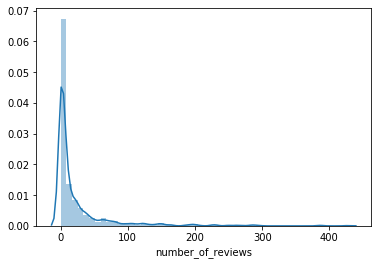

Distribution of  reviews_per_month :
Skweness:  2.6632037808095874


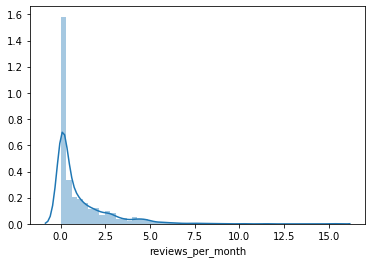

Distribution of  calculated_host_listings_count :
Skweness:  8.233808107546356


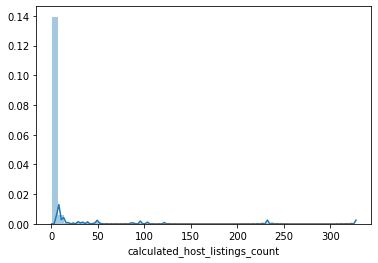

Distribution of  availability_365 :
Skweness:  0.7598883201948172


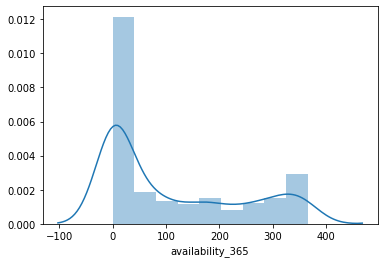

In [18]:
#c)
import seaborn as sns
for col in df.select_dtypes(include='number').columns:
    print('Distribution of ',col,':')
    print('Skweness: ',df[col].skew())
    sns.distplot(df[col])
    plt.show()

### 4.	Summarize relationships among variables (10 marks)               
a.	Plot correlation plots. Which are the variables most correlated with Target? Which independent variables are correlated among themselves? Do you want to exclude some variables from the model based on this analysis? What other actions will you take?


b.	Plot all independent variables with the target. Are all relationships linear? If not, what steps would you take based on this information?

 Hint: based on your observations you may want to transform features or create additional features.


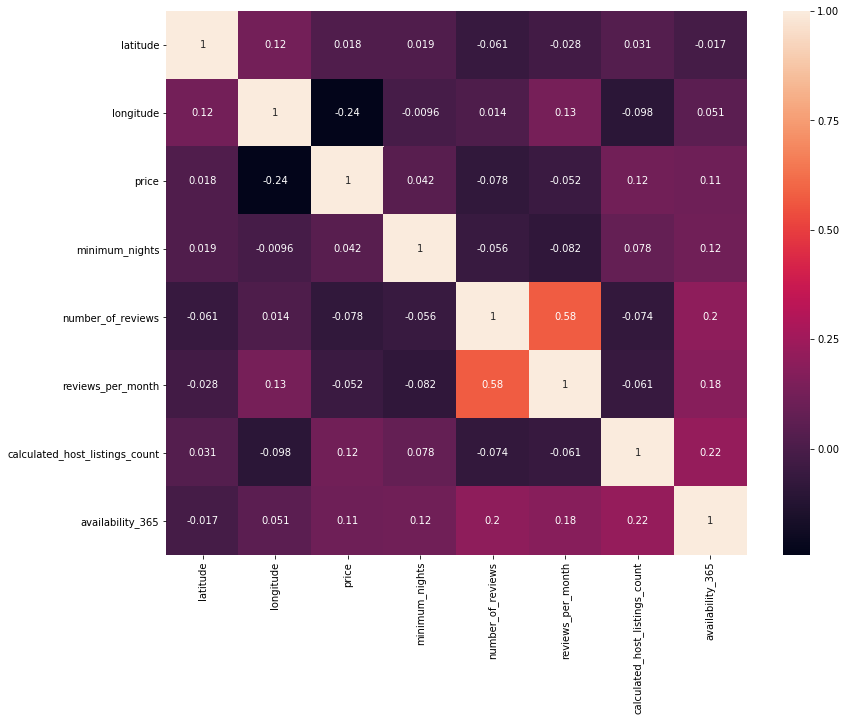

In [19]:
#a)Correlation plot

plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),annot=True)

Inference:

    None of the independent is highly co-related with the target variable

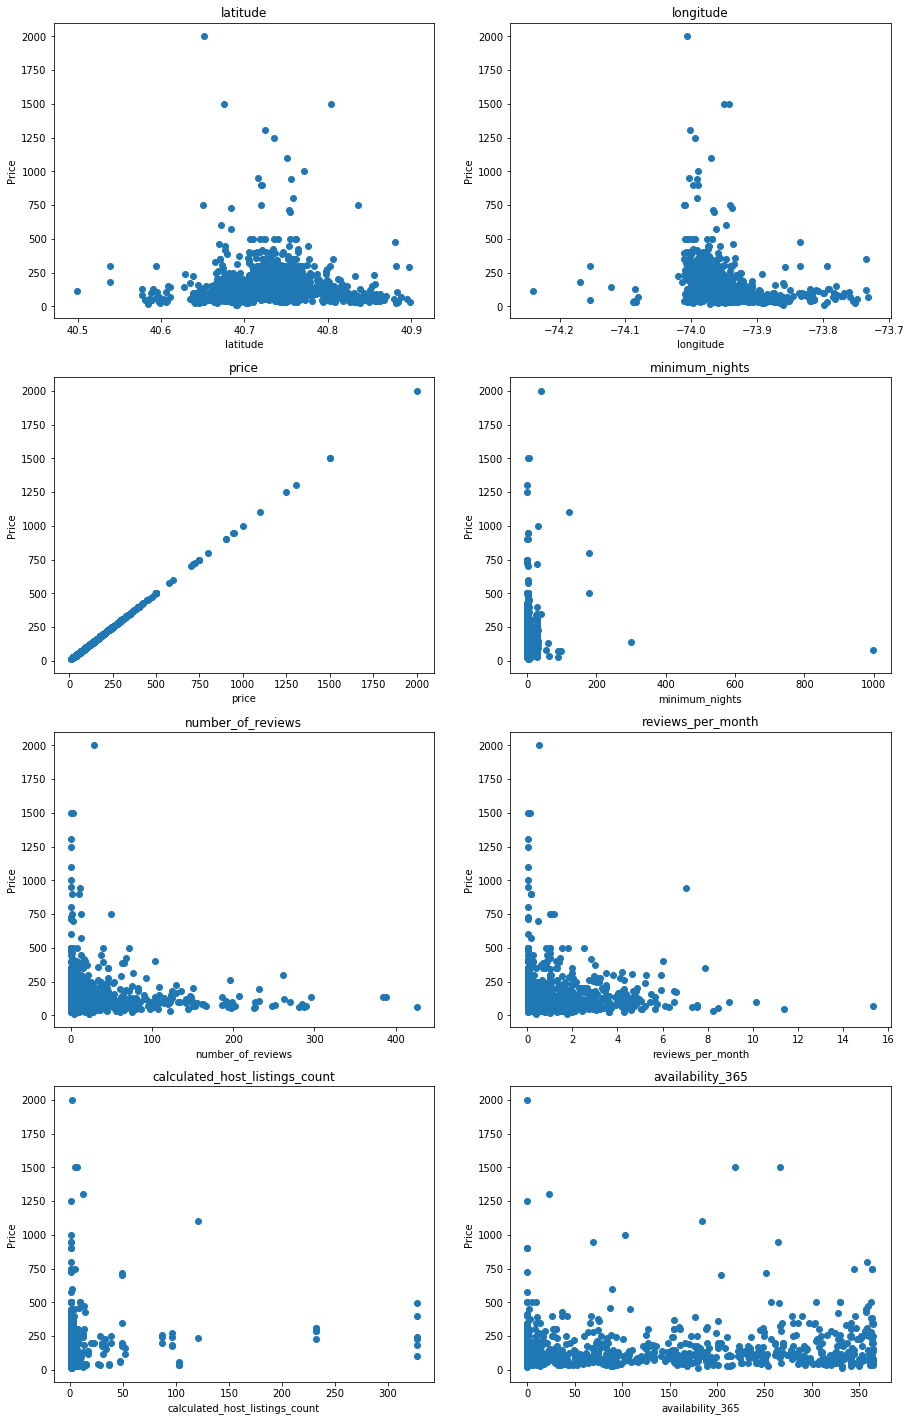

In [20]:
#b)independent numerical variables with the target
q=1
plt.figure(figsize=(15,25))
for col in df.select_dtypes(include='number').columns:
    plt.subplot(4,2,q)
    plt.title(col)
    plt.scatter(df[col],df['price'])
    plt.xlabel(col)
    plt.ylabel('Price')
    q+=1
plt.show()

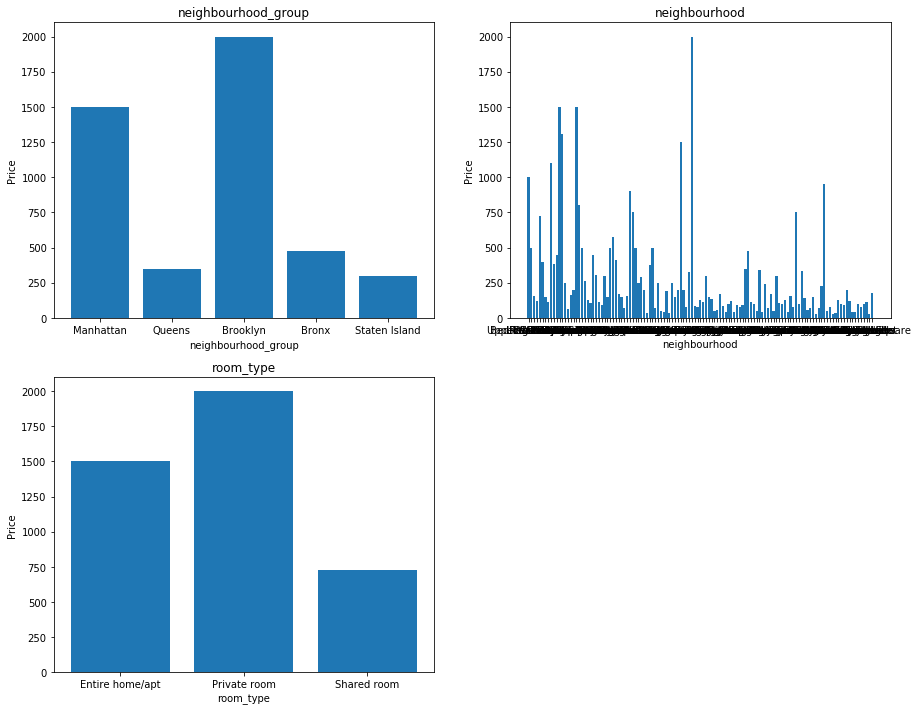

In [21]:
#b)independent categorical variables with the target
q=1
plt.figure(figsize=(15,25))
for col in df.select_dtypes(include='object').columns:
    plt.subplot(4,2,q)
    plt.title(col)
    plt.bar(df[col],df['price'])
    plt.xlabel(col)
    plt.ylabel('Price')
    q+=1
plt.show()

Inference:
    
    None of the dependent variables have linear relation with the target variable which may be due to the outliers as it may be due to the bias on outliers.
    
    

Transformation:

In [22]:
df_copy=df.copy()

In [23]:
df_copy.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [24]:
df_copy.select_dtypes(include='number').columns

Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [25]:
import numpy as np
df_copy['price']=np.log(df_copy['price']+1)
df_copy['minimum_nights']=np.log(df_copy['minimum_nights']+1)
df_copy['number_of_reviews']=np.log(df_copy['number_of_reviews']+1)
df_copy['reviews_per_month']=np.log(df_copy['reviews_per_month']+1)
df_copy['calculated_host_listings_count']=np.log(df_copy['calculated_host_listings_count']+1)
df_copy['availability_365']=np.log(df_copy['availability_365']+1)

Converting Longitude column to categorical:

In [26]:
mean_val=df['longitude'].mean()

In [27]:
df_copy['longitude']=df_copy['longitude'].astype('object')

In [28]:
def long_zone(x):
    if int(x)>=mean_val:
        return 'Zone A'
    elif int(x)<mean_val:
        return 'Zone B'  

In [29]:
df_copy['longitude']=df_copy['longitude'].apply(long_zone)

In [30]:
df_copy['longitude'].value_counts()

Zone A    983
Zone B     71
Name: longitude, dtype: int64

Since neighbourhoor column has 123 unique categories it looses it significance to the target variable. So we drop the column.

In [31]:
df_copy.drop('neighbourhood',axis=1,inplace=True)

Since correlation of latitude and price(target column) is almost 0 we drop the column.

In [32]:
df_copy.drop('latitude',axis=1,inplace=True)

Since we hav the number of reviews per month column we also drop last_review column

In [37]:
df_copy.drop('last_review',axis=1,inplace=True)

Dummification of categorical columns:

In [64]:
df_final=pd.get_dummies(df_copy,columns=['room_type','neighbourhood_group','longitude'],drop_first=True)

In [65]:
df_final.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Private room,room_type_Shared room,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,longitude_Zone B
0,5.620401,3.433987,1.609438,0.139762,2.564949,5.298317,0,0,0,1,0,0,0
1,4.709530,1.098612,0.693147,0.029559,0.693147,0.000000,1,0,0,1,0,0,0
2,4.025352,1.098612,3.258097,1.214913,1.386294,3.663562,1,0,0,0,1,0,0
3,4.574711,1.098612,0.693147,0.029559,0.693147,0.000000,0,0,0,0,1,0,0
4,4.394449,0.693147,0.000000,0.019803,0.693147,1.791759,1,0,1,0,0,0,0


## 5.	Split dataset into train and test (70:30) (5 MARKS)

#### a.Are both train and test representative of the overall data? How would you ascertain this statistically?


In [92]:
X=df_final.drop('price',axis=1)
y=df_final['price']

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

Since the target variable is continuous variable we do one way anova to ascertain this statistically.

Hence the hypothesis formed is as follows:
    
    H0: Both train and test represent overall data.
    HA: Both train and test do not represent overall data.

In [94]:
from scipy.stats import f_oneway
f_oneway(y_train,y_test,y)

F_onewayResult(statistic=0.19986749150347358, pvalue=0.8188547865070481)

Since P-Value is greater than alpha(0.05), we accept the null hypothesis and we can say that the split represents the population.

###  6.	Fit a base model. Please write your key observations (15 marks) 

a.	What is the overall R2? Please comment on whether it is good or not. 

b.	What is the adjusted R2? Is it different from R2? Why?

c.	Which variables are significant?

d.	Is there multicollinearity?

e.	Which other key model output parameters do you want to look at? 


In [95]:
#a)
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,y_train)
print('Overall Score for train: ',LR.score(X_train,y_train))
print('Overall Score for test: ',LR.score(X_test,y_test))

Overall Score for train:  0.5630238301585413
Overall Score for test:  0.34877008667485


From the above we can see that the model is over fit. So R2 value is not good.

In [96]:
#b)
import statsmodels.api as sm

Xc=sm.add_constant(X)
LR_ols=sm.OLS(y,Xc).fit()
LR_ols.summary()

/home/deploy/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     90.27
Date:                Mon, 20 Jul 2020   Prob (F-statistic):          6.71e-152
Time:                        08:10:35   Log-Likelihood:                -751.79
No. Observations:                1054   AIC:                             1530.
Df Residuals:                    1041   BIC:                             1594.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 4.8600      0.099     49.294      0.000       4.667       5.053
minimum_nights                       -0.1237      0.020     -6.229      0.000      -0.163      -0.085
number_of_reviews                    -0.0432      0.016     -2.782      0.005      -0.074      -0.013
reviews_per_month                    -0.0615      0.045     -1.377      0.169      -0.149       0.026
calculated_host_listings_count        0.0266      0.020      1.300      0.194      -0.014       0.067
availability_365                      0.0509      0.008      6.754      0.000       0.036       0.066
room_type_Private room               -0.7911      0.033    -24.303      0.000      -0.855      -0.727
room_type_Shared room                -1.0438      0.092    -11.308      0.000      -1.225      -0.863
neighbourhood_group_Brooklyn          0.3001      0.092      3.278      0.001       0.120       0.480
neighbourhood_group_Manhattan         0.5814      0.092      6.324      0.000       0.401       0.762
neighbourhood_group_Queens            0.0715      0.098      0.731      0.465      -0.120       0.263
neighbourhood_group_Staten Island    -0.1412      0.192     -0.734      0.463      -0.519       0.236
longitude_Zone B                      0.2212      0.067      3.295      0.001       0.089       0.353
==============================================================================
Omnibus:                      286.040   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1701.735
Skew:                           1.108   Prob(JB):                         0.00
Kurtosis:                       8.817   Cond. No.                         71.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since Adj. R2 is 50% and R2 is 51% for train data, this is different as, R2 is the ratio of sum of explained variance and total variance and adj. R2 is the ratio of R2 and statistical fluke.

#c)

Based on the above OLS model the features that have P-Value less than alpha(0.05) are significant features.

Hence reviews_per_month,room_type_Shared room and neighbourhood_group_Staten Iland columns are insignificant.

In [97]:
#d)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=[variance_inflation_factor(Xc.values,i) for i in range(Xc.shape[1])]
pd.DataFrame({'vif':vif[1:]},index=X.columns)

,vif
minimum_nights,1.358312
number_of_reviews,2.528270
reviews_per_month,2.752623
calculated_host_listings_count,1.320618
availability_365,1.447979
room_type_Private room,1.122754
room_type_Shared room,1.103352
neighbourhood_group_Brooklyn,8.645139
neighbourhood_group_Manhattan,8.822866
neighbourhood_group_Queens,4.411291


Hence we drop the columns that have multicollinearity greater than 6.

In [98]:
#e)
y_pred=LR.predict(X_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error

mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test,y_pred)
print('MSE=',mse)
print('RMSE=',rmse)
print('MAE=',mae)

MSE= 0.3238106615517568
RMSE= 0.5690436376515924
MAE= 0.37297001578807454


### 7.	How do you improve the accuracy of the model? Write clearly the changes that you will make before re-fitting the model. Fit the final model. (20 marks)
Please feel free to have any number of iterations to get to the final answer. Marks are awarded based on the quality of final model you are able to achieve. 


In [99]:
#Backward Elimination:
cols=list(X.columns)
pmax=1
while (len(cols)>0):
    p=[]
    X_1=X[cols]
    X_1=sm.add_constant(X_1)
    model=sm.OLS(y,X_1).fit()
    p=pd.Series(model.pvalues.values[1:],index=cols)
    pmax=max(p)
    feature_with_p_max=p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE=cols
print(selected_features_BE)

['minimum_nights', 'number_of_reviews', 'availability_365', 'room_type_Private room', 'room_type_Shared room', 'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan', 'longitude_Zone B']


/home/deploy/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


We refit the final Linear model using the above selected features and removing the features with high multicollinearity.

In [101]:
X_BE=df_final[['minimum_nights', 'number_of_reviews', 'availability_365', 'room_type_Private room', 'room_type_Shared room', 'longitude_Zone B']]
y_BE=df_final['price']

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X_BE,y_BE,test_size=0.3,random_state=10)

In [103]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,y_train)
print('Overall Score for train: ',LR.score(X_train,y_train))
print('Overall Score for test: ',LR.score(X_test,y_test))

Overall Score for train:  0.49492012931275997
Overall Score for test:  0.25714697756905236


In [104]:
y_pred=LR.predict(X_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error

mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test,y_pred)
print('MSE=',mse)
print('RMSE=',rmse)
print('MAE=',mae)

MSE= 0.36936836546847485
RMSE= 0.607756830869448
MAE= 0.4153626798986856


### 8.	Summarize as follows (10 marks) 

a.	Summarize the overall fit of the model and list down the measures to prove that it is a good model

b.	Write down a business interpretation/explanation of the model – which variables are affecting the target the most and explain the relationship. Feel free to use charts or graphs to explain.

c.	What changes from the base model had the most affect on model performance

d.	What are the key risks to your results and interpretation


#a)

After Re-Fitting the final model the overall Sore of train has decressed from 56% to 49%, simultaniously the test score also has decreased from 34% to 25% hence we can say that there is no improvement in the model.

#b)
From the above scatter plot we can say that room_type feature had effect on the model, which was infered from the scatter plot in 4b.

#C)
Using the features which had the significance to the target variable and removing the columns that had high multicollinearity had the most affect on the model.

#d)

Since there was no proper features with high correlation to the target variable there was high risk in order to get a good model, and so we did not achive a good model. and we can say that the price is not been denoted using any feature but is been denoted in random or there is bias in some or the other way towards the price.

We can do some ensamble techniques like lasso and ridge regression in order to improve the model the come to a new conclusion.